In [1]:
import pandas as pd
data = pd.read_csv("dds_ch2_nyt/nyt16.csv")

data

,Age,Gender,Impressions,Clicks,Signed_In
0,57,0,4,0,1
1,0,0,6,0,0
2,0,0,8,1,0
3,0,0,6,0,0
4,0,0,5,0,0
...,...,...,...,...,...
448912,0,0,4,0,0
448913,0,0,8,0,0
448914,32,1,4,0,1
448915,0,0,4,0,0


In [2]:
data_no_null_age = data[(data.Signed_In == 1) & (data.Age > 0)]
data_no_null_age

,Age,Gender,Impressions,Clicks,Signed_In
0,57,0,4,0,1
5,53,1,5,0,1
6,58,1,8,0,1
8,54,0,6,0,1
9,45,1,0,0,1
...,...,...,...,...,...
448907,46,0,3,0,1
448910,49,0,3,0,1
448911,26,0,3,0,1
448914,32,1,4,0,1


In [3]:
def first(data):
    if data < 18:
        return "<18"
    if data <= 24:
        return "18-24"
    if data <= 34:
        return "25-34"
    if data <= 44:
        return "35-44"
    if data <= 54:
        return "45-54"
    if data <= 64:
        return "55-64"
    return "65+"

In [4]:
data_no_null_age["age_group"] = data_no_null_age.Age.apply(lambda x: first(x))
data_no_null_age

/var/folders/tq/13d3hm697ds01qx5n95rx5fr0000gn/T/ipykernel_45722/3911776101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age["age_group"] = data_no_null_age.Age.apply(lambda x: first(x))


,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,57,0,4,0,1,55-64
5,53,1,5,0,1,45-54
6,58,1,8,0,1,55-64
8,54,0,6,0,1,45-54
9,45,1,0,0,1,45-54
...,...,...,...,...,...,...
448907,46,0,3,0,1,45-54
448910,49,0,3,0,1,45-54
448911,26,0,3,0,1,25-34
448914,32,1,4,0,1,25-34


In [5]:
grouped_data = data_no_null_age[["Age", "Impressions", "Clicks", "age_group"]].groupby("age_group").mean()
grouped_data["CTR"] = grouped_data.Clicks / grouped_data.Impressions
grouped_data

,Age,Impressions,Clicks,CTR
age_group,,,,
18-24,20.837220,4.989476,0.057544,0.011533
25-34,29.493530,5.000023,0.050185,0.010037
35-44,39.502492,5.007558,0.051617,0.010308
45-54,49.502108,5.001856,0.051793,0.010355
55-64,59.495212,4.992832,0.100063,0.020041
65+,72.965978,5.005105,0.149641,0.029898
<18,15.257776,4.992829,0.149469,0.029937


<AxesSubplot: xlabel='age_group', ylabel='CTR'>

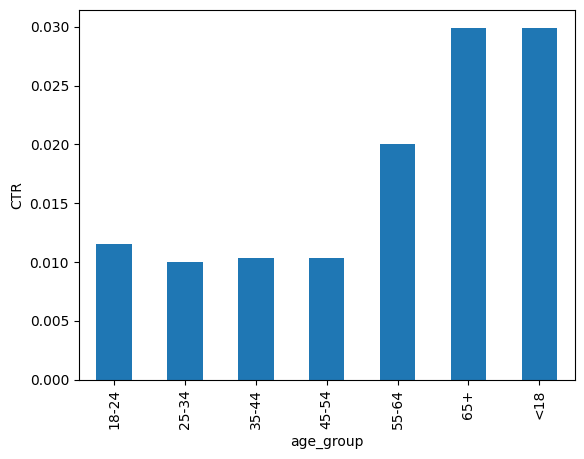

In [6]:
grouped_data.CTR.plot(kind="bar", ylabel="CTR")
